## 데이터 확인

In [41]:
from copy import deepcopy
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.metrics import *
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X = iris['data'] 
y = iris['target']
X.shape

(150, 4)

## 중심점 찾기

데이터 중 k개 랜덤으로 선택

In [42]:
k = 3
n = X.shape[0]
c = X.shape[1]
a = np.arange(c)
np.random.shuffle(a)
centers = a[:k]
X[centers]

array([[4.6, 3.1, 1.5, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.9, 3. , 1.4, 0.2]])

## k-means algorithm

In [43]:
centers_old = np.zeros(X[centers].shape)
centers_new = deepcopy(X[centers])
error = np.linalg.norm(centers_new - centers_old)
clusters = np.zeros(n)
distances = np.zeros((n,k))

error = 이전 중심과 새로운 중심의 내적을 구하여 이전 중심과 새로운 중심의 차이가 0이 될때까지 반복

In [44]:
while error != 0:
    for i in range(k):
        distances[:,i] = np.linalg.norm(X - X[centers][i], axis=1)
    clusters = np.argmin(distances, axis = 1)
    centers_old = deepcopy(centers_new)
    for i in range(k):
        centers_new[i] = np.mean(X[clusters == i], axis=0)
    error = np.linalg.norm(centers_new - centers_old)
centers_new

array([[5.224     , 2.864     , 3.564     , 1.18      ],
       [5.04545455, 3.65909091, 1.44545455, 0.26818182],
       [6.16407767, 2.97572816, 4.29902913, 1.40291262]])

## 성능

In [45]:
confusion_matrix(clusters, y)

array([[ 8,  9,  8],
       [22,  0,  0],
       [20, 41, 42]], dtype=int64)

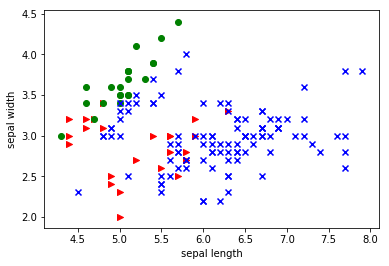

In [46]:
for t in range(3):
    if t == 0:
        c='r'
        marker='>'
    elif t == 1:
        c='g'
        marker='o'
    elif t == 2:
        c='b'
        marker='x'
    plt.scatter(X[clusters == t, 0],   # sepal length
                X[clusters == t, 1],   # sepal width
                marker = marker,
                c = c)
    plt.xlabel("sepal length")
    plt.ylabel("sepal width")

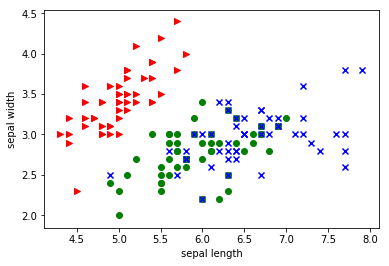

In [47]:
for t in range(3):
    if t == 0:
        c='r'
        marker='>'
    elif t == 1:
        c='g'
        marker='o'
    elif t == 2:
        c='b'
        marker='x'
    plt.scatter(X[y == t, 0],   # sepal length
                X[y == t, 1],   # sepal width
                marker = marker,
                c = c)
    plt.xlabel("sepal length")
    plt.ylabel("sepal width")